In [1]:
from picamera2 import Picamera2, Preview
picam2 = Picamera2()

picam2.start_preview(Preview.NULL)
picam2.start_and_capture_file("test.jpg")

<function matplotlib.pyplot.show(close=None, block=None)>

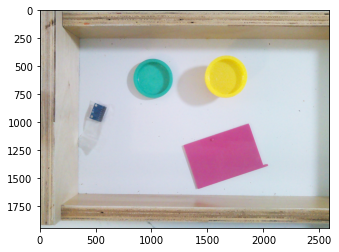

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('test.jpg')
cv2.startWindowThread()
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
cv2.waitKey(0)
plt.show

In [3]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# rgba(200,81,147,255)
# rgba(21,173,187,255)
# rgba(212,188,12,255)
lower_bound = np.array([50, 80, 140])
upper_bound = np.array([200, 255, 255])
mask = cv2.inRange(hsv, lower_bound, upper_bound)

In [4]:
kernel = np.ones((7,7),np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

In [5]:
segmented_img = cv2.bitwise_and(img, img, mask=mask)

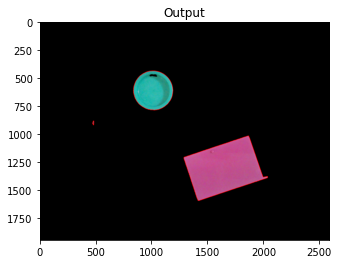

In [6]:
contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.drawContours(segmented_img, contours, -1, (0, 0, 255), 3)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Output")
plt.show()

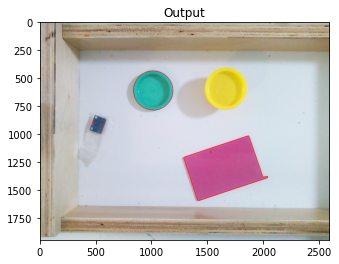

In [7]:
lower_bound = np.array([20, 80, 80])
upper_bound = np.array([30, 255, 255])
output = cv2.drawContours(img, contours, -1, (0, 0, 255), 3)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Output")
plt.show()